In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


#### function for analysis

In [2]:
# install
!pip install mlflow dagshub pycaret

  Obtaining dependency information for mlflow from https://files.pythonhosted.org/packages/64/4a/514286f441cade293efcdf77c9733d4ea3d50cd67e8b444beca1b9d85572/mlflow-2.8.0-py3-none-any.whl.metadata
  Obtaining dependency information for dagshub from https://files.pythonhosted.org/packages/69/45/c55a035b9db76fed64a4f17af7dba1e8ff5e7831e2160bd2ae3b618b508b/dagshub-0.3.9-py3-none-any.whl.metadata
  Obtaining dependency information for pycaret from https://files.pythonhosted.org/packages/d5/54/d575af389203fc27d6c6cf7d60c4e67fcabfda4bc8e84271c8a396bd4a03/pycaret-3.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for databricks-cli<1,>=0.8.7 from https://files.pythonhosted.org/packages/ae/a3/d56f8382c40899301f327d1c881278b09c9b8bc301c2c111633a0346d06e/databricks_cli-0.18.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gunicorn<22 from https://files.pythonhosted.org/packages/0e/2a/c3a878eccb100ccddf45c50b6b8db8cf3301a6adede6e31d48e8531cab13/gunicorn-21.2.

### mlflow run

In [20]:
import dagshub
import mlflow

dagshub.init("kaggle_competition_titanic_tr", "toku-dango", mlflow=True)
mlflow.set_tracking_uri('https://dagshub.com/toku-dango/kaggle_competition_titanic_tr.mlflow')

########### Experimentの生成
EX_NAME = "kaggle_titanic_1110"

experiment = mlflow.get_experiment_by_name(EX_NAME)
if experiment is None:  # 当該Experiment存在しないとき、新たに作成
    experiment_id = mlflow.create_experiment(
                            name=EX_NAME)
else: # 当該Experiment存在するとき、IDを取得
    experiment_id = experiment.experiment_id
print(experiment_id)
mlflow.set_experiment(experiment_name=EX_NAME)


mlflow.sklearn.autolog()

########### IDの生成
RUN_ID = ""
RUN_NAME = "hogehoge_model_1112"

if not RUN_ID:
    mlflow.end_run()
    mlflow.start_run(experiment_id=experiment_id,run_name=RUN_NAME, run_id=None)
    RUN_ID = mlflow.active_run().info.run_id  # run_idはこれで取得できる
elif RUN_ID:  # 後から、同じrun_idに追記する時
    try:
        mlflow.start_run(experiment_id=experiment_id,run_name=RUN_NAME, run_id=RUN_ID)
    except:
        print("except_try")
        mlflow.end_run()
        mlflow.start_run(experiment_id=experiment_id,run_name=RUN_NAME, run_id=RUN_ID)

TASK_NAME = "check"
# MLflowによるロギング開始
mlflow.set_tag(RUN_NAME, TASK_NAME)  # Run Nameを指定

Repository initialized!

2


#### MLFLOW Check
tag save: mlflow.set_tag(key, value)  
log_param: log_param("param1", 5)  
log_metric: log_metric("foo", 1)  
artifact(file) save: log_artifact('plot.png') 


In [7]:
import pycaret
#!mlflow ui
from pycaret import show_versions
show_versions()


System:
    python: 3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:40:32) [GCC 12.3.0]
executable: /opt/conda/bin/python3.10
   machine: Linux-5.15.133+-x86_64-with-glibc2.31

PyCaret required dependencies:
                 pip: 23.2.1
          setuptools: 68.1.2
             pycaret: 3.1.0
             IPython: 8.14.0
          ipywidgets: 7.7.1
                tqdm: 4.66.1
               numpy: 1.23.5
              pandas: 1.5.3
              jinja2: 3.1.2
               scipy: 1.10.1
              joblib: 1.3.2
             sklearn: 1.2.2
                pyod: 1.1.1
            imblearn: 0.11.0
   category_encoders: 2.6.3
            lightgbm: 3.3.2
               numba: 0.57.1
            requests: 2.31.0
          matplotlib: 3.8.1
          scikitplot: 0.3.7
         yellowbrick: 1.5
              plotly: 5.16.1
    plotly-resampler: Not installed
             kaleido: 0.2.1
           schemdraw: 0.15
         statsmodels: 0.14.0
              sktime: 0.21.1
       

### data_input

In [21]:
#from pycaret.regression import *


from pycaret.classification import *

train = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv("../input/titanic/test.csv")

In [22]:
#train.describe()
print(len(train))
train.head(10)

891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Survived  0: Dead  1: Survived
Sex                           
female         81          233
male          468          109
0: Dead
Sex
female     81
male      468
Name: 0: Dead, dtype: int64
Survived
0: Dead         81
1: Survived    233
Name: female, dtype: int64


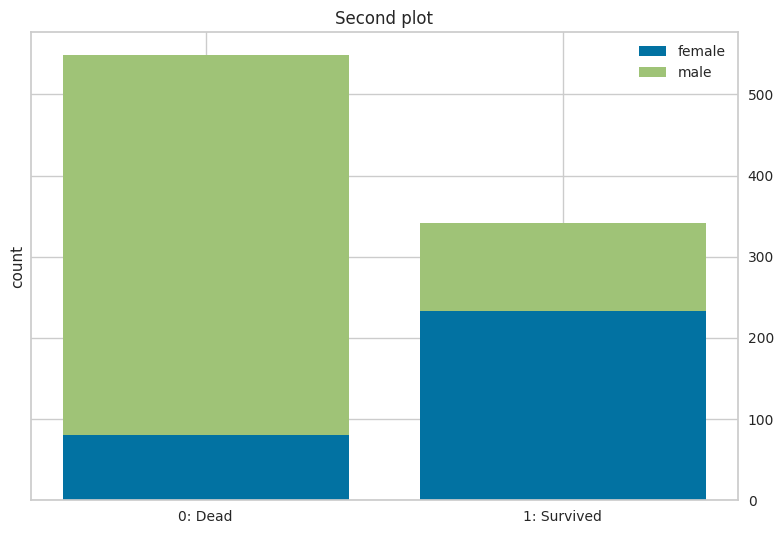

In [23]:
DICT_SURVIVED = {0: '0: Dead', 1: '1: Survived'}

feature_name = "Sex"

train_re = train.groupby([feature_name])["Survived"].value_counts(sort=False).unstack().rename(columns=DICT_SURVIVED)
print(train_re)
index_ = train_re.index.values
columns_ = train_re.columns.values
print(columns_[0])

print(train_re.loc[:,columns_[0]])
print(train_re.loc[index_[0]])

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)

for i in range(len(index_)):
    ax.bar(columns_, train_re.loc[index_[i]], bottom=train_re.loc[index_[:i]].sum(), label=index_[i])
ax.set_title('Second plot')
#ax.set_xlabel(columns_)
ax.set_ylabel("count")
ax.yaxis.tick_right()
ax.legend()

fig.tight_layout()



### feature eng

In [24]:
import re

pat = re.compile("[,.]")
temp = train["Name"].str.split(pat, expand=True)
print(temp)
print(temp.nunique())
print(temp.info())
#print(temp.loc[:,0].nunique())

temp_test = test["Name"].str.split(pat, expand=True)

if 1:
    train["FirstName"] = temp.loc[:,0]
    train["Honorific"] = temp.loc[:,1]
    train["LastName"] = temp.loc[:,2]
    train["FamilyNumber"] = train["SibSp"] + train["Parch"]
if 1:
    test["FirstName"] = temp_test.loc[:,0]
    test["Honorific"] = temp_test.loc[:,1]
    test["LastName"] = temp_test.loc[:,2]
    test["FamilyNumber"] = test["SibSp"] + test["Parch"]


             0      1                                       2     3
0       Braund     Mr                             Owen Harris  None
1      Cumings    Mrs   John Bradley (Florence Briggs Thayer)  None
2    Heikkinen   Miss                                   Laina  None
3     Futrelle    Mrs           Jacques Heath (Lily May Peel)  None
4        Allen     Mr                           William Henry  None
..         ...    ...                                     ...   ...
886   Montvila    Rev                                  Juozas  None
887     Graham   Miss                          Margaret Edith  None
888   Johnston   Miss                Catherine Helen "Carrie"  None
889       Behr     Mr                             Karl Howell  None
890     Dooley     Mr                                 Patrick  None

[891 rows x 4 columns]
0    667
1     17
2    799
3      1
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Co

In [25]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstName,Honorific,LastName,FamilyNumber
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel),1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Moran,Mr,James,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr,Timothy J,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Palsson,Master,Gosta Leonard,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Johnson,Mrs,Oscar W (Elisabeth Vilhelmina Berg),2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Nasser,Mrs,Nicholas (Adele Achem),1


### ml_set

In [28]:
import pandas as pd
reg = setup(train, target = 'Survived',
            #log_experiment=True,
            log_plots = True,
            log_profile = True,
            log_data = True,
            #='kaggle_titanic_add',
            ignore_features = ["PassengerId", "Ticket", "Cabin", "Name", "FirstName", "SibSp", "Parch"],
            max_encoding_ohe = 10,
            numeric_imputation = "median",
            categorical_features = ["Pclass", "Sex", "Embarked", "Honorific", "LastName"],
            bin_numeric_features = ["Fare"],
            normalize = True,
            normalize_method = "zscore",
            #remove_multicollinearity = True,
            #multicollinearity_threshold = True
            #feature_selection = True
            #polynomial_features = True,
            #group_features = ['wheel', 'time']
            #create_clusters = True
            )

2023/11/12 14:28:05 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.


,Description,Value
0,Session id,3497
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 16)"
4,Transformed data shape,"(891, 13)"
5,Transformed train set shape,"(623, 13)"
6,Transformed test set shape,"(268, 13)"
7,Ignore features,7
8,Ordinal features,1
9,Numeric features,3


In [29]:
pipeline = get_config("pipeline")
print(pipeline)

X_train = get_config("X_train")
X_train.head(20)


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Age', 'Fare', 'FamilyNumber'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='median',
                                                              verbose='deprecated'))),
                ('categorical_imputer',
                 TransformerWrapper(ex...
                                                              verbose=0))),
                ('bin_numeric_features',
            

,Pclass,Sex,Age,Fare,Embarked,Honorific,LastName,FamilyNumber
194,1,female,44.0,27.720800,C,Mrs,James Joseph (Margaret Tobin),0
268,1,female,58.0,153.462494,S,Mrs,William Thompson (Edith Junkins),1
134,2,male,25.0,13.000000,S,Mr,Samuel James Hayden,0
375,1,female,NaN,82.170799,C,Mrs,Edgar Joseph (Leila Saks),1
531,3,male,NaN,7.229200,C,Mr,Nakli,0
746,3,male,16.0,20.250000,S,Mr,Rossmore Edward,2
768,3,male,NaN,24.150000,Q,Mr,Daniel J,1
584,3,male,NaN,8.712500,C,Mr,Uscher,0
507,1,male,NaN,26.549999,S,Mr,"George (""George Arthur Brayton"")",0
801,2,female,31.0,26.250000,S,Mrs,Harvey (Charlotte Annie Tate),2


In [30]:
X_transformed = get_config("X_transformed")
X_transformed.head(20)

,Pclass_1.0,Pclass_2.0,Pclass_3.0,Sex,Age,Fare,Embarked_C,Embarked_S,Embarked_Q,Honorific,LastName,FamilyNumber
194,1.722833,-0.470711,-1.143419,-1.363011,1.089105,0.576253,2.047356,-1.593666,-0.314270,1.628824,1.268681,-0.541028
268,1.722833,-0.470711,-1.143419,-1.363011,2.139589,1.835921,-0.488435,0.627484,-0.314270,1.628824,1.268681,0.088991
134,-0.580439,2.124447,-1.143419,0.733670,-0.336552,-0.683416,-0.488435,0.627484,-0.314270,-0.804707,-0.771416,-0.541028
375,1.722833,-0.470711,-1.143419,-1.363011,-0.111449,1.835921,2.047356,-1.593666,-0.314270,1.628824,1.268681,0.088991
531,-0.580439,-0.470711,0.874570,0.733670,-0.111449,-0.683416,2.047356,-1.593666,-0.314270,-0.804707,-0.771416,-0.541028
746,-0.580439,-0.470711,0.874570,0.733670,-1.011864,-0.683416,-0.488435,0.627484,-0.314270,-0.804707,-0.771416,0.719011
768,-0.580439,-0.470711,0.874570,0.733670,-0.111449,0.576253,-0.488435,-1.593666,3.181981,-0.804707,-0.771416,0.088991
584,-0.580439,-0.470711,0.874570,0.733670,-0.111449,-0.683416,2.047356,-1.593666,-0.314270,-0.804707,-0.771416,-0.541028
507,1.722833,-0.470711,-1.143419,0.733670,-0.111449,0.576253,-0.488435,0.627484,-0.314270,-0.804707,1.268681,-0.541028
801,-0.580439,2.124447,-1.143419,-1.363011,0.113655,0.576253,-0.488435,0.627484,-0.314270,1.628824,1.268681,0.719011


In [31]:
X_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 194 to 69
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass_1.0    891 non-null    float64
 1   Pclass_2.0    891 non-null    float64
 2   Pclass_3.0    891 non-null    float64
 3   Sex           891 non-null    float64
 4   Age           891 non-null    float64
 5   Fare          891 non-null    float64
 6   Embarked_C    891 non-null    float64
 7   Embarked_S    891 non-null    float64
 8   Embarked_Q    891 non-null    float64
 9   Honorific     891 non-null    float64
 10  LastName      891 non-null    float64
 11  FamilyNumber  891 non-null    float64
dtypes: float64(12)
memory usage: 90.5 KB


### ml_compare models

In [32]:
top3 = compare_models(experiment_custom_tags="test_1112", sort="Accuracy",  n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7945,0.7999,0.5406,0.8786,0.6640,0.5303,0.5652,0.1110
lr,Logistic Regression,0.7495,0.8120,0.3938,0.9146,0.5384,0.4063,0.4774,0.6940
nb,Naive Bayes,0.7045,0.8354,0.2761,0.8633,0.4039,0.2808,0.3580,0.1110
qda,Quadratic Discriminant Analysis,0.6902,0.7084,0.2560,0.8076,0.3609,0.2429,0.3092,0.0970
et,Extra Trees Classifier,0.6872,0.7659,0.3846,0.6558,0.4784,0.2800,0.3021,0.2240
catboost,CatBoost Classifier,0.6772,0.6989,0.4199,0.6457,0.4769,0.2719,0.2985,1.4860
rf,Random Forest Classifier,0.6758,0.7746,0.2690,0.7578,0.3625,0.2203,0.2818,0.2140
xgboost,Extreme Gradient Boosting,0.6678,0.7220,0.4888,0.5844,0.5047,0.2710,0.2840,0.1160
svm,SVM - Linear Kernel,0.6438,0.0000,0.2813,0.5792,0.3679,0.1657,0.1890,0.1000
ada,Ada Boost Classifier,0.6308,0.6688,0.6101,0.5191,0.5562,0.2450,0.2508,0.1500


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

In [33]:
top3


[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                      weights='uniform'),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=3497, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 GaussianNB(priors=None, var_smoothing=1e-09)]

### blend_models

In [30]:
blended = blend_models(estimator_list= top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.0000,0.5833,0.7778,0.6667,0.5051,0.5168
1,0.8095,0.0000,0.5417,0.9286,0.6842,0.5610,0.6028
2,0.8413,0.0000,0.7917,0.7917,0.7917,0.6635,0.6635
3,0.7903,0.0000,0.6522,0.7500,0.6977,0.5384,0.5415
4,0.7581,0.0000,0.6250,0.7143,0.6667,0.4781,0.4807
5,0.8226,0.0000,0.7083,0.8095,0.7556,0.6173,0.6207
6,0.8065,0.0000,0.5833,0.8750,0.7000,0.5654,0.5908
7,0.7581,0.0000,0.5833,0.7368,0.6512,0.4698,0.4773
8,0.8710,0.0000,0.8333,0.8333,0.8333,0.7281,0.7281


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

### ml_create model

In [31]:
model = create_model('lr', experiment_custom_tags="1110")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.8397,0.5833,0.7778,0.6667,0.5051,0.5168
1,0.8095,0.8387,0.5833,0.8750,0.7000,0.5685,0.5936
2,0.8413,0.9562,0.7917,0.7917,0.7917,0.6635,0.6635
3,0.7903,0.8239,0.6522,0.7500,0.6977,0.5384,0.5415
4,0.7581,0.8180,0.6250,0.7143,0.6667,0.4781,0.4807
5,0.8387,0.9073,0.7917,0.7917,0.7917,0.6601,0.6601
6,0.8065,0.8476,0.5833,0.8750,0.7000,0.5654,0.5908
7,0.7581,0.8213,0.6667,0.6957,0.6809,0.4862,0.4865
8,0.8710,0.8849,0.8333,0.8333,0.8333,0.7281,0.7281


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [32]:
mlflow.log_param('tag', "before_tune")
print(model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7305, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### tuned_model

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8413,0.8280,0.7500,0.8182,0.7826,0.6580,0.6595
1,0.8254,0.8376,0.7083,0.8095,0.7556,0.6207,0.6240
2,0.8571,0.9583,0.8750,0.7778,0.8235,0.7042,0.7077
3,0.7903,0.8406,0.7391,0.7083,0.7234,0.5547,0.5550
4,0.7581,0.8268,0.6667,0.6957,0.6809,0.4862,0.4865
5,0.8065,0.8942,0.8333,0.7143,0.7692,0.6043,0.6096
6,0.8065,0.8454,0.6667,0.8000,0.7273,0.5792,0.5850
7,0.7903,0.8257,0.7917,0.7037,0.7451,0.5681,0.5709
8,0.8226,0.8893,0.8333,0.7407,0.7843,0.6345,0.6377


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

2023/11/10 14:49:11 WARNING mlflow.utils: Truncated the value of the key `param_distributions`. Truncated value: `{'actual_estimator__C': [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036, 0.037, 0.038, 0.039, 0.04, 0.041, 0.042, 0.043, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049, 0.05, 0.051, 0.052, 0.053, 0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06, 0.061, 0.062, 0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07, 0.071, 0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08, 0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09, 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099, 0.1, 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107, 0.108, 0.109, 0.11, 0.111, 0.112, 0.113, 0.114, 0.115, 0.116, 0.117, 0.118, 0.119, 0.12, 0.121, 0.122, 0.123, 0.124, 0.125,

Fitting 10 folds for each of 10 candidates, totalling 100 fits


2023/11/10 14:49:38 WARNING mlflow.sklearn.utils: Failed to autolog metrics for RandomizedSearchCV. Logging error: This RandomizedSearchCV instance was initialized with `refit=False`. predict is available only after refitting on the best parameters. You can refit an estimator manually using the `best_params_` attribute
2023/11/10 14:49:38 WARNING mlflow.sklearn.utils: _get_classifier_artifacts.<locals>.plot_confusion_matrix failed. The artifact training_confusion_matrix will not be recorded. Artifact error: This RandomizedSearchCV instance was initialized with `refit=False`. predict is available only after refitting on the best parameters. You can refit an estimator manually using the `best_params_` attribute
2023/11/10 14:49:38 WARNING mlflow.sklearn.utils: RocCurveDisplay.from_estimator failed. The artifact training_roc_curve will not be recorded. Artifact error: response method decision_function or predict_proba is not defined in RandomizedSearchCV
2023/11/10 14:49:38 WARNING mlflow

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7305, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


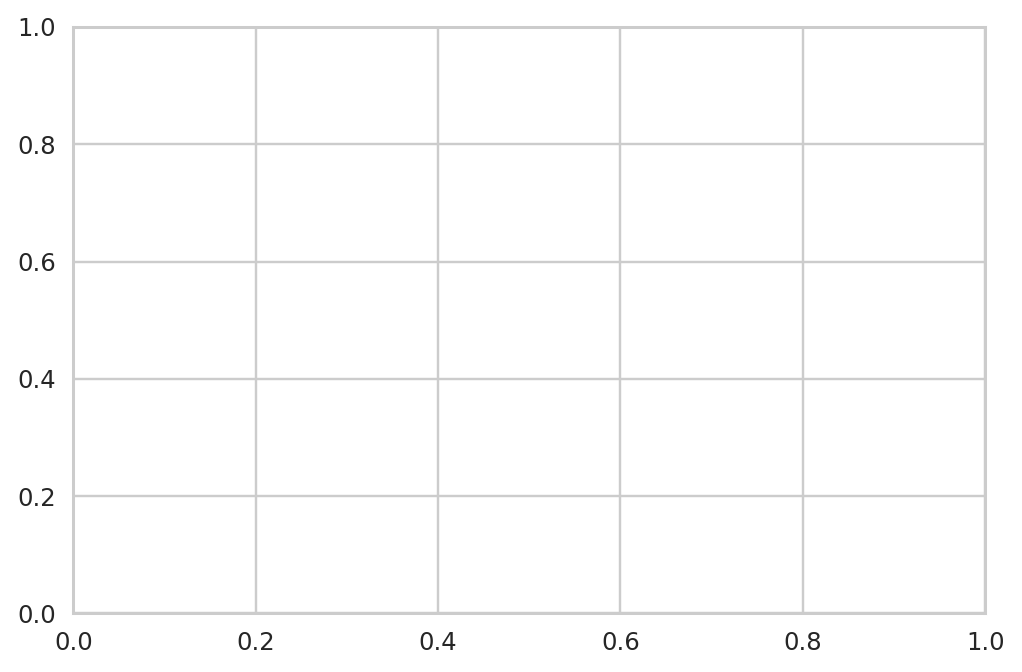

In [33]:
tuned_model = tune_model(model,optimize="AUC")
mlflow.log_param('tag', "tuned")
print(model)

In [35]:
# Feature Importance
classification_flg = 1

if classification_flg == 1: 
    evaluate_model(tuned_model)
    #interpret_model(tuned_model)

#plot_model(tuned_model, plot = 'auc', save = True)
#plot_model(tuned_model, plot = 'residuals')
#plot_model(tuned_model, plot = 'cooks')
# plot_model(tuned_model, plot = 'error', save = True)
#plot_model(tuned_model, plot = 'auc')
# plot_model(tuned_model, plot = 'feature', save = True)
# plot_model(tuned_model, plot = 'feature_all', save = True)
# plot_model(tuned_model, plot = 'parameter', save = True)
# plot_model(tuned_model, plot = 'rfe', save = True)
# plot_model(tuned_model, plot = 'learning', save = True)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [36]:
final_model = finalize_model(tuned_model)
print(final_model)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Age', 'Fare', 'FamilyNumber'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='median',
                                                              verbose='deprecated'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=None,...
                                                                 encode='ordinal',
                                              

In [188]:
auc_fig = plot_model(tuned_model, plot = 'auc', save = True)
print(auc_fig)
print(tuned_model)
save_model(tuned_model, "tuned")
#mlflow.log_figure(r"/kaggle/working/AUC.png", "auc.png")

AUC.png
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=836, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Fare', 'FamilyNumber'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='median',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None,...
                                                                  encode='ordinal',
                                

### predict test data

In [189]:
#save_model(tuned_model,"sample_model") #モデルの保存
# テストデータの予測
result = predict_model(
    tuned_model, # モデル
    data=test, # テストデータ
    raw_score=True, # ラベル予測時のscoreを表示
)
result

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstName,Honorific,LastName,FamilyNumber,prediction_label,prediction_score_0,prediction_score_1
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.829200,NaN,Q,Kelly,Mr,James,0,0,0.9297,0.0703
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.000000,NaN,S,Wilkes,Mrs,James (Ellen Needs),1,0,0.5937,0.4063
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.687500,NaN,Q,Myles,Mr,Thomas Francis,0,0,0.8864,0.1136
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.662500,NaN,S,Wirz,Mr,Albert,0,0,0.9261,0.0739
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.287500,NaN,S,Hirvonen,Mrs,Alexander (Helga E Lindqvist),2,1,0.4572,0.5428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.050000,NaN,S,Spector,Mr,Woolf,0,0,0.8965,0.1035
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.900002,C105,C,Oliva y Ocana,Dona,Fermina,0,1,0.1644,0.8356
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.250000,NaN,S,Saether,Mr,Simon Sivertsen,0,0,0.9214,0.0786
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.050000,NaN,S,Ware,Mr,Frederick,0,0,0.9303,0.0697


### make submit file

In [191]:
submit = result[['PassengerId', 'prediction_label']]
submit = submit.rename(columns={'prediction_label':'Survived'})
submit.to_csv("submission.csv", encoding='utf-8', index=False)

### close

In [192]:
mlflow.end_run()

In [84]:
!kaggle competitions submit -c titanic -f /kaggle/working/catboost_info/submission.csv -m "Message"

Traceback (most recent call last):
  File "/opt/conda/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/opt/conda/lib/python3.10/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/opt/conda/lib/python3.10/site-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
